# 1. Take an image and apply Fourier Transform on it. Display original, Transformed and inverse transformed image.

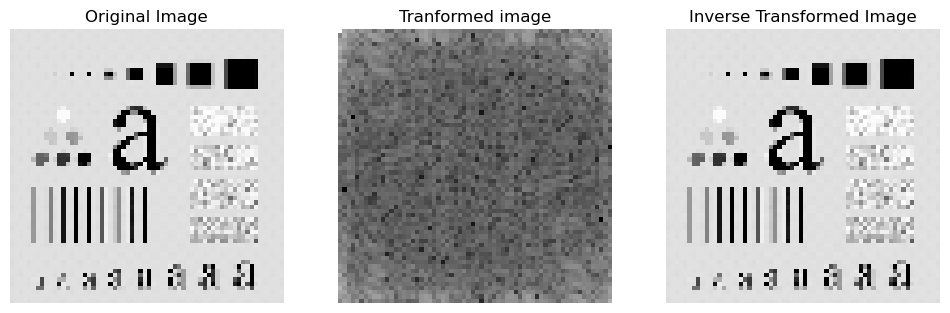

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found")
    return cv2.resize(img, (64, 64))  

def dft2d(img):
    M, N = img.shape
    dft = np.zeros((M, N), dtype=complex)
    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    e = np.exp(-2j * np.pi * ((u*x)/M + (v*y)/N))
                    sum_val += img[x, y] * e
            dft[u, v] = sum_val
    return dft

def idft2d(dft):
    M, N = dft.shape
    img_recon = np.zeros((M, N), dtype=complex)
    for x in range(M):
        for y in range(N):
            sum_val = 0
            for u in range(M):
                for v in range(N):
                    e = np.exp(2j * np.pi * ((u*x)/M + (v*y)/N))
                    sum_val += dft[u, v] * e
            img_recon[x, y] = sum_val / (M * N)
    return np.abs(img_recon).astype(np.uint8)

def plot_images(original, magnitude, reconstructed):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(np.log(1 + np.abs(magnitude)), cmap='gray')
    plt.title("Tranformed image¶¶")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(reconstructed, cmap='gray')
    plt.title("Inverse Transformed Image")
    plt.axis('off')

    plt.show()

def main():
    img = read_img("../test_imgs/test_img.png")
    dft = dft2d(img)
    reconstructed_img = idft2d(dft)
    plot_images(img, dft, reconstructed_img)

if __name__ == "__main__":
    main()
